# Social Influence Modeling in Networks
## ---- Estimating and Embedding Heavy-Tailed Networks
#### Code 1 : Estimating Scale Parameter

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math, powerlaw
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from itertools import count
import csv
import warnings
warnings.filterwarnings("ignore")

生成并可视化Barabasi Albert图

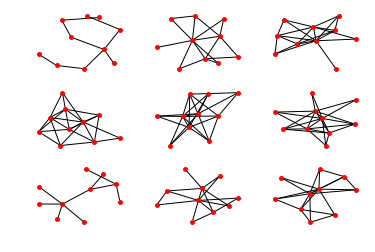

In [2]:
for n in range(9):
    ax = plt.subplot2grid((3,3), (int(n/3),n%3), colspan=1)
    ba = nx.barabasi_albert_graph(10, n%6+1)
    nx.draw_spring(ba, node_size=15)

plt.show()

Estimate the Scale Parameter

使用的数据集来自SNAP http://snap.stanford.edu/data/

In [3]:
def process(text, delim):
    g = nx.Graph()
    with open("./data/"+text+".txt") as f:
        reader = csv.reader(f, delimiter=delim)
        for row in reader:
            g.add_edge(int(row[0]), int(row[1]))
    degree = sorted(d for n, d in g.degree().items())
    fit = powerlaw.Fit(degree)
    cdfx = np.sort(degree)
    cdfy = 1 - np.cumsum(degree)/np.sum(degree)
    plt.plot(cdfx, cdfy, color="b")
    plt.yscale("log")
    plt.xscale("log")
    plt.title("Degree Distribution of " + text + " (Parameter:" + str(fit.alpha)+")")
    plt.xlabel("degree")
    plt.ylabel("CCDF")
    plt.axvspan(fit.xmin, max(cdfx), color="y", alpha=0.2)
    plt.savefig("./img/"+text+".pdf")
    plt.show()

Calculating best minimal value for power law fit


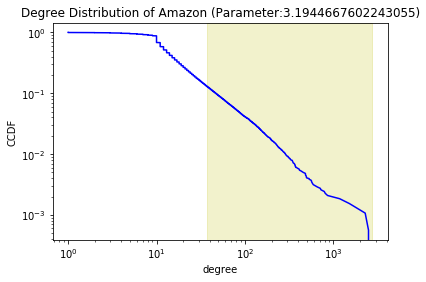

Calculating best minimal value for power law fit


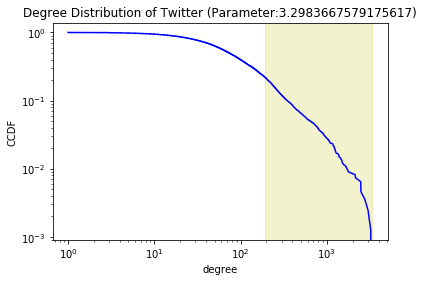

Calculating best minimal value for power law fit


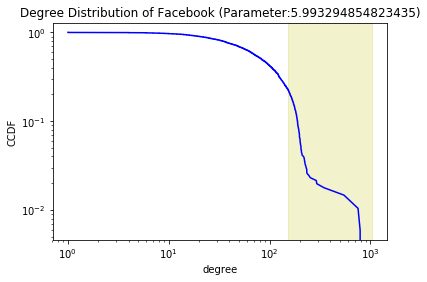

Calculating best minimal value for power law fit


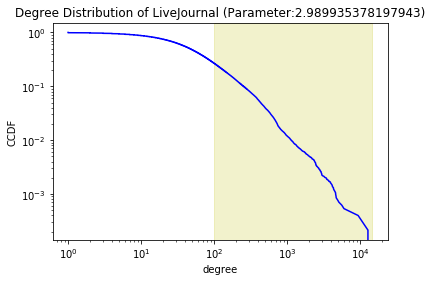

Calculating best minimal value for power law fit


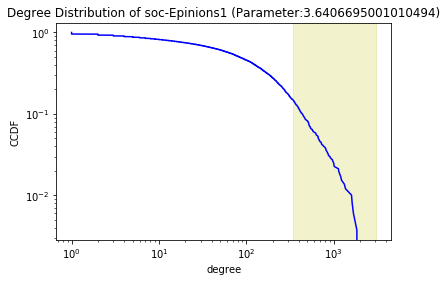

In [4]:
process("Amazon", '\t')
process("Twitter", " ")
process("Facebook", " ")
process("LiveJournal", '\t')
process("soc-Epinions1", '\t')